In [54]:
from utils.utils import *
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
%matplotlib inline

# Linear Regression

In [2]:
N = 300
X, y = generate_random_xy(lambda x: 4+3*x, N, scale_x=2)

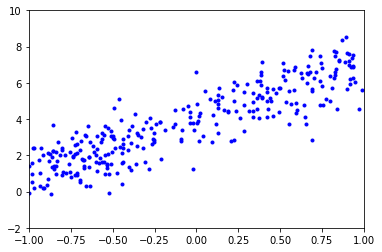

In [3]:
plt.plot(X, y, "b.")
plt.axis([-1,1,-2,10])
plt.show()

In [4]:
X_b = np.c_[np.ones((N, 1)), X]

In [5]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [6]:
theta_best

array([[3.96744795],
       [3.00333025]])

In [7]:
# now we can make predictions

In [8]:
X_new = np.array([[-1], [1]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[0.9641177 ],
       [6.97077819]])

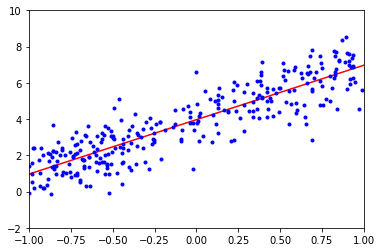

In [9]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([-1,1,-2,10])
plt.show()

In [10]:
# equivalent code in scikit-learn
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.96744795]), array([[3.00333025]]))

In [11]:
lin_reg.predict(X_new)

array([[0.9641177 ],
       [6.97077819]])

In [12]:
# gradient descent

In [13]:
eta = 0.1
n_iterations = 100
m = N
theta = np.random.randn(2,1)
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta -= eta * gradients

In [14]:
theta

array([[3.9672611 ],
       [3.00161534]])

In [15]:
# stochastic gradient descent
# we update one var at a time

In [16]:
m = N
n_epochs = 50
t0, t1 = 5, 50
def learning_schedule(t):
    return t0/(t+t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        random_idx = np.random.randint(m)
        xi = X_b[random_idx:random_idx+1]
        yi = y[random_idx:random_idx+1]
        gradients = 2*xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch*m+i)
        theta -= eta * gradients

In [17]:
theta

array([[3.97313646],
       [3.01937009]])

In [18]:
# equivalent sklearn example

In [19]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())
sgd_reg.intercept_, sgd_reg.coef_

(array([3.96596618]), array([3.01244912]))

In [20]:
# mini-batch gradient descent, computes on a small random subset of data

In [21]:
# polynomial
m = 100
X, y = generate_random_xy(lambda x: .5*x**2+x+2, m, scale_x=6)

[-3, 3, 0, 10]

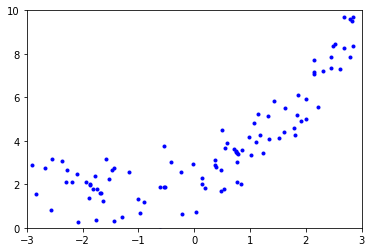

In [22]:
plt.plot(X, y, "b.")
plt.axis([-3,3,0,10])

In [23]:
from sklearn.preprocessing import PolynomialFeatures
poly_f = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_f.fit_transform(X)
X[0]

array([2.84319451])

In [24]:
X_poly[0]

array([2.84319451, 8.08375502])

In [25]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.1833494]), array([[1.08599046, 0.45516027]]))

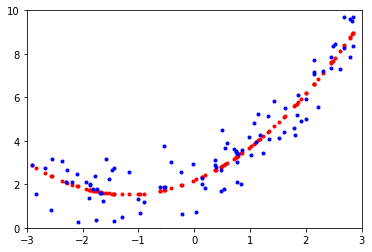

In [26]:
f = lambda x: lin_reg.coef_[0][1]*x**2 + lin_reg.coef_[0][0]*x+lin_reg.intercept_
plt.plot(X, f(X), "r.")
plt.plot(X, y, "b.")
plt.axis([-3,3,0,10])
plt.show()

In [27]:
# learning curves

In [28]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, x, y, xrange=None, yrange=None):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    if xrange and yrange:
        plt.axis(xrange+yrange)
    plt.plot(np.sqrt(train_errors), "r+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

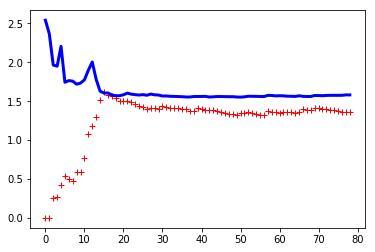

In [29]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

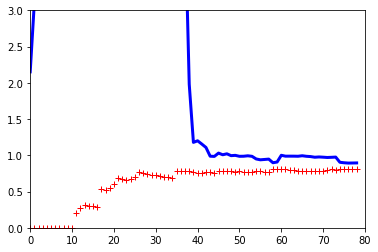

In [31]:
# will 10-degree polynomial perform better
from sklearn.pipeline import Pipeline
poly_reg = Pipeline((
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression())
))
plot_learning_curves(poly_reg, X, y, xrange=[0,80],yrange=[0,3])

# Regularized models

### Ridge Regression (Tikhonov regularizaion)
* keeps model weights small
* regularization is added to cost function only during training, while performance measure for testing shouldn't
* have any regularization term in in

\begin{align}
    J(\theta) & = MSE(\theta) + \frac{1}{2} \alpha \sum_{i=1}^n \theta_i^2 \\
    \hat{\theta} & = \left( \mathbf{X^T} \cdot \mathbf{X} + \alpha \mathbf{A} \right)^{-1} \cdot \mathbf{X^T} \cdot\mathbf{y}
\end{align}

In [39]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[5.20535855]])

#### Stochastic gradient descent

In [43]:
sgd_reg = SGDRegressor(penalty="l2", tol=1e-3) # penalty is Ridge regression term
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([5.15543892])

### Lasso Regression
* lasso = least absolute shrinkage and selection operator regression
* uses $l_1$ norm instead of $l_2$ norm as in Ridge
* lasso automatically performs feature selection with a few nonzero feature weights

\begin{align}
    J(\theta) & = MSE(\theta) + \alpha \sum_{i=1}^n |\theta_i| \\
\end{align}

In [46]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([5.16476442])

### Elastic Net
* uses a combination of $l_1$ and $l_2$ regularizations
\begin{align}
    J(\theta) & = MSE(\theta) + r \alpha \sum_{i=1}^n |\theta_i| + \frac{1-r}{2} \alpha \sum_{i=1}^n \theta^2_i
\end{align}

In [49]:
from sklearn.linear_model import ElasticNet
ela_net = ElasticNet(alpha=0.1, l1_ratio=.5)
ela_net.fit(X,y)
ela_net.predict([[1.5]])

array([5.16179902])

### Early Stopping
* stop when you reach first minimum

In [60]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler()),
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

In [68]:
from sklearn.base import clone
sgd_reg = SGDRegressor(max_iter=1, warm_start=True, penalty=None, learning_rate="constant", eta0=.0005)
minimum_val_error = float("inf")
best_epoch = None
bets_model = None
epochs = list()
errors = list()
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val_predict, y_val)
    epochs.append(epoch)
    errors.append(val_error)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

* NOTE that warm_start=True in fit method continues training where it left off

In [69]:
best_epoch, best_model

(224, SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
        fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
        loss='squared_loss', max_iter=1, n_iter=None, penalty=None,
        power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
        warm_start=True))

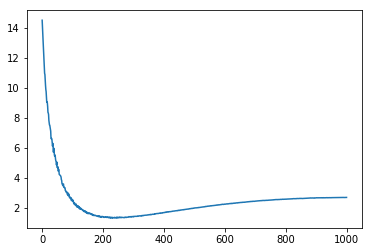

In [70]:
plt.plot(epochs, errors)

### Logistic regression
\begin{align}
    \sigma & = \frac{1}{1+e^{-t}}
\end{align}

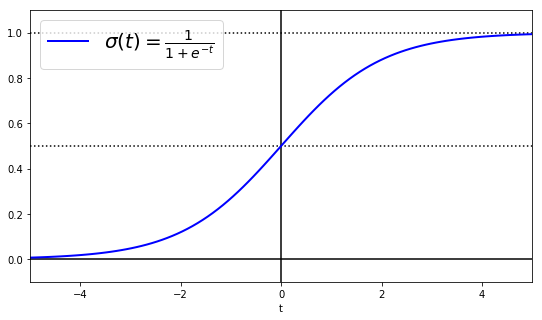

In [79]:
x_range = [-5, 5]
t = np.linspace(*x_range, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 5))
plt.plot(x_range, [0, 0], "k-")
plt.plot(x_range, [0.5, 0.5], "k:")
plt.plot(x_range, [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis(x_range + [-0.1, 1.1])
plt.show()

In [80]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['DESCR', 'target_names', 'data', 'target', 'feature_names']

In [85]:
X = iris['data'][:, 3:] # petal width
y = (iris['target'] == 2).astype(np.int) # 1 if Iris-Virginica, else 0

In [86]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

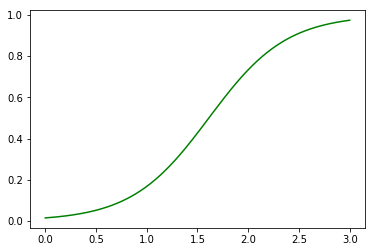

In [92]:
X_new = np.linspace(0,3,1000).reshape(-1,1) # 1000 points for [0:3] range
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:,1], "g-", label="Iris-Virginica")

In [94]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

### Softmax or Multinomial Logistic Regression
* logistic regression to support multiple classes

In [125]:
X = iris['data'][:, (2,3)] # petal length, petal width
y = iris['target']
softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X, y)


LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [126]:
softmax_reg.predict([[5,2]])

array([2])

In [127]:
softmax_reg.predict_proba([[5,2]])

array([[6.33134078e-07, 5.75276067e-02, 9.42471760e-01]])

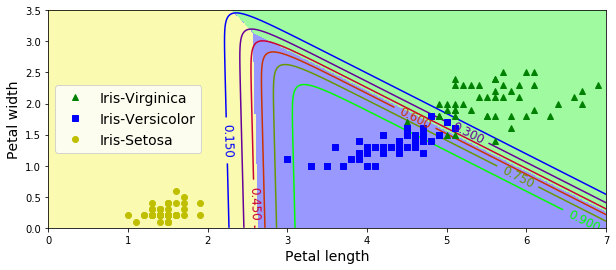

In [171]:
# scatter plot
plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])

# contour plot
from matplotlib.colors import ListedColormap
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

regions = True
if regions:    
    yellow, purple, green = '#fafab0','#9898ff','#a0faa0'
    custom_cmap = ListedColormap([yellow, purple, green])
    y_predict = softmax_reg.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    plt.contourf(x0, x1, zz, cmap=custom_cmap)

contour_lines = True
if contour_lines:
    y_proba = softmax_reg.predict_proba(X_new)
    zz1 = y_proba[:, 1].reshape(x0.shape)
    contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
    plt.clabel(contour, inline=1, fontsize=12)